In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
# Generate synthetic data
np.random.seed(42)
num_patients = 1000
data = {
    'Age': np.random.randint(18, 90, size=num_patients),
    'Gender': np.random.choice(['Male', 'Female'], size=num_patients),
    'Height': np.random.randint(150, 200, size=num_patients),  # in cm
    'Weight': np.random.randint(50, 120, size=num_patients),   # in kg
    'Diagnosis': np.random.choice(['Diabetes', 'Hypertension', 'Heart Disease', 'Healthy'], size=num_patients),
    'Outcome': np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3])  # 0: No event, 1: Event occurred
}
df = pd.DataFrame(data)
df.to_csv('synthetic_patient_data.csv', index=False)



In [3]:
# Load the dataset
df = pd.read_csv('synthetic_patient_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Data types and missing values
print("\nData types and missing values:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



First few rows of the dataset:
   Age  Gender  Height  Weight      Diagnosis  Outcome
0   69    Male     163      59       Diabetes        1
1   32    Male     188      65       Diabetes        1
2   89  Female     174     103  Heart Disease        1
3   78    Male     169     119   Hypertension        1
4   38    Male     151      93       Diabetes        1

Basic statistics:
               Age       Height       Weight      Outcome
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     52.881000   174.301000    84.801000     0.291000
std      20.958915    14.464495    19.819087     0.454451
min      18.000000   150.000000    50.000000     0.000000
25%      34.750000   162.000000    68.000000     0.000000
50%      52.500000   174.000000    85.000000     0.000000
75%      71.000000   186.250000   102.000000     1.000000
max      89.000000   199.000000   119.000000     1.000000

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 

In [4]:
# Convert categorical features into numerical ones
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check for unique values in 'Gender'
print(df['Gender'].unique())

# Handle missing values in 'Gender'
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_gender)

# Convert 'Diagnosis' to numeric
df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Create new feature: BMI
df['BMI'] = df['Weight'] / (df['Height']/100)**2

# Print the first few rows to ensure proper conversion
print(df.head())



[0 1]
   Age  Gender  Height  Weight  Diagnosis  Outcome        BMI
0   69       0     163      59          0        1  22.206331
1   32       0     188      65          0        1  18.390675
2   89       1     174     103          2        1  34.020346
3   78       0     169     119          3        1  41.665208
4   38       0     151      93          0        1  40.787685


In [5]:
# Prepare the data for modeling
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [6]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_resampled, y_resampled)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print('\nLogistic Regression Accuracy after SMOTE:', accuracy_score(y_test, y_pred_logistic))
print('Logistic Regression Classification Report after SMOTE:\n', classification_report(y_test, y_pred_logistic))
print('Logistic Regression Confusion Matrix after SMOTE:\n', confusion_matrix(y_test, y_pred_logistic))



Logistic Regression Accuracy after SMOTE: 0.525
Logistic Regression Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.74      0.54      0.63       147
           1       0.27      0.47      0.34        53

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.62      0.53      0.55       200

Logistic Regression Confusion Matrix after SMOTE:
 [[80 67]
 [28 25]]


In [7]:
# Train a Random Forest model as a comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)

print('\nRandom Forest Accuracy after SMOTE:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Classification Report after SMOTE:\n', classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix after SMOTE:\n', confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy after SMOTE: 0.63
Random Forest Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       147
           1       0.29      0.26      0.27        53

    accuracy                           0.63       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.62      0.63      0.63       200

Random Forest Confusion Matrix after SMOTE:
 [[112  35]
 [ 39  14]]


In [8]:
# Train the Logistic Regression model with class weights
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print('\nLogistic Regression Accuracy with Class Weights:', accuracy_score(y_test, y_pred_logistic))
print('Logistic Regression Classification Report with Class Weights:\n', classification_report(y_test, y_pred_logistic))
print('Logistic Regression Confusion Matrix with Class Weights:\n', confusion_matrix(y_test, y_pred_logistic))



Logistic Regression Accuracy with Class Weights: 0.505
Logistic Regression Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.73      0.52      0.61       147
           1       0.26      0.45      0.33        53

    accuracy                           0.51       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.60      0.51      0.53       200

Logistic Regression Confusion Matrix with Class Weights:
 [[77 70]
 [29 24]]


In [9]:
# Train a Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print('\nRandom Forest Accuracy with Class Weights:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Classification Report with Class Weights:\n', classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix with Class Weights:\n', confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy with Class Weights: 0.72
Random Forest Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       147
           1       0.38      0.09      0.15        53

    accuracy                           0.72       200
   macro avg       0.56      0.52      0.49       200
weighted avg       0.65      0.72      0.65       200

Random Forest Confusion Matrix with Class Weights:
 [[139   8]
 [ 48   5]]


In [10]:
# Print unique values in 'Gender' before any processing
print("Unique values in 'Gender' before any processing:")
print(df['Gender'].unique())

# Check if 'Gender' is already numeric
if df['Gender'].dtype == 'object':
    # Handle missing values in 'Gender' by filling them with the mode
    if df['Gender'].isnull().sum() > 0:
        mode_gender = df['Gender'].mode()[0]
        df['Gender'].fillna(mode_gender, inplace=True)

    # Convert categorical 'Gender' to numeric values
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Print unique values in 'Gender' after processing
print("Unique values in 'Gender' after processing:")
print(df['Gender'].unique())

# Check for missing values in 'Gender' after processing
print("Missing values in 'Gender' after processing:")
print(df['Gender'].isnull().sum())

# Convert 'Diagnosis' to numeric
df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Create new feature: BMI
df['BMI'] = df['Weight'] / (df['Height']/100)**2

# Print the first few rows to ensure proper conversion
print(df.head())

Unique values in 'Gender' before any processing:
[0 1]
Unique values in 'Gender' after processing:
[0 1]
Missing values in 'Gender' after processing:
0
   Age  Gender  Height  Weight  Diagnosis  Outcome        BMI
0   69       0     163      59          0        1  22.206331
1   32       0     188      65          0        1  18.390675
2   89       1     174     103          2        1  34.020346
3   78       0     169     119          3        1  41.665208
4   38       0     151      93          0        1  40.787685


First few rows of the numeric dataframe:
   Age  Gender  Height  Weight  Diagnosis  Outcome        BMI
0   69       0     163      59          0        1  22.206331
1   32       0     188      65          0        1  18.390675
2   89       1     174     103          2        1  34.020346
3   78       0     169     119          3        1  41.665208
4   38       0     151      93          0        1  40.787685

Missing values in each numeric column:
Age          0
Gender       0
Height       0
Weight       0
Diagnosis    0
Outcome      0
BMI          0
dtype: int64


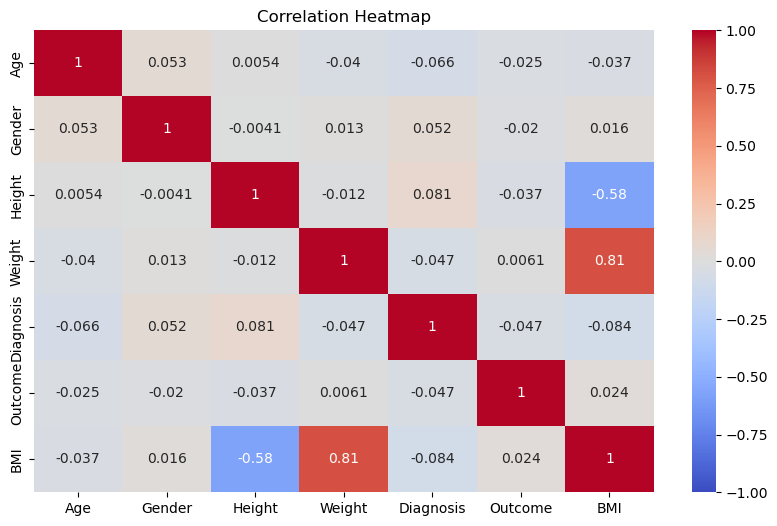

In [11]:
# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Print the first few rows of the numeric dataframe
print("First few rows of the numeric dataframe:")
print(numeric_df.head())

# Check if there are any missing values
print("\nMissing values in each numeric column:")
print(numeric_df.isnull().sum())

# Ensure there are no missing values before plotting
if numeric_df.isnull().sum().sum() == 0:
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("\nThere are missing values in the numeric columns, please handle them before plotting.")

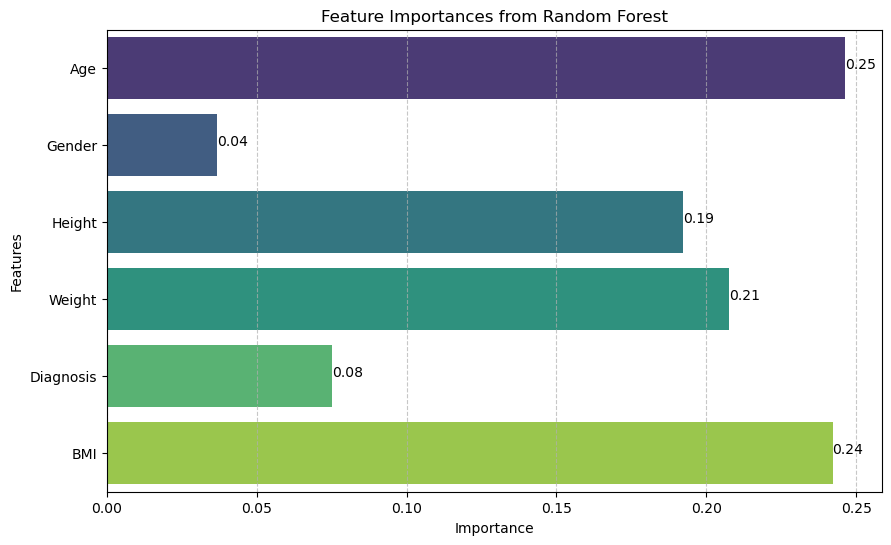

In [12]:
# Assuming rf_model is your trained Random Forest model and X is the feature set
importances = rf_model.feature_importances_
features = X.columns

# Convert features and importances into a DataFrame for Seaborn compatibility
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Visualize feature importance from Random Forest model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue='Feature', dodge=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Remove legend

# Adding the values on the bars
for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()
